In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from matplotlib.pyplot import figure
import plotly.express as px
from random import sample 
from sklearn.cluster import KMeans

### Cleaning Data
Now that we have our datasets we want to concatenate them into one table that shows the entire NBA statistics from 1995 to 2020 (ongoing), remove nan fields, rename columns, and. The key difference between this and the Kaggle dataset is the addition of Offensive BPM (Box Plus/Minus), defensive BPM, BPM and VORP (Value over Replacement Player)

We will clean this dataset

In [2]:
df = pd.read_csv("./data/1995ref.csv")
for i in range (0,25):
    name =i+1996
    file = ("./data/"+str(name)+"ref.csv")
    df1  = pd.read_csv(file)
    frame = [df,df1]
    df = pd.concat(frame)

In [3]:
df.head(15000)

year              player  pos   age team_id     g      mp   per  ts_pct  \
0    1995      Alaa Abdelnaby   PF  26.0     TOT  54.0   506.0  12.6   0.519   
1    1995      Alaa Abdelnaby   PF  26.0     SAC  51.0   476.0  14.1   0.540   
2    1995      Alaa Abdelnaby   PF  26.0     PHI   3.0    30.0 -12.5   0.091   
3    1995  Mahmoud Abdul-Rauf   PG  25.0     DEN  73.0  2082.0  17.8   0.543   
4    1995       Michael Adams   PG  32.0     CHH  29.0   443.0  17.7   0.583   
..    ...                 ...  ...   ...     ...   ...     ...   ...     ...   
234  2020        Jerami Grant   PF  25.0     DEN  58.0  1523.0  14.3   0.584   
235  2020           Josh Gray   PG  26.0     NOP   2.0    23.0  -5.0   0.500   
236  2020         Danny Green   SG  32.0     LAL  56.0  1396.0  11.4   0.570   
237  2020      Draymond Green   PF  29.0     GSW  43.0  1222.0  12.6   0.489   
238  2020                 NaN  NaN   NaN     NaN   NaN     NaN   NaN     NaN   

     fg3a_per_fga_pct  ...  ws-dum  ows  dws   ws  ws_per_48  bpm-dum  obpm  \
0               0.009  ...     NaN -0.4  0.7  0.3      0.027      NaN  -4.6   
1               0.009  ...     NaN -0.1  0.7  0.6      0.058      NaN  -3.6   
2               0.000  ...     NaN -0.3  0.0 -0.3     -0.466      NaN -17.6   
3               0.214  ...     NaN  3.8  1.3  5.0      0.115      NaN   2.3   
4               0.547  ...     NaN  1.1  0.5  1.6      0.169      NaN   2.5   
..                ...  ...     ...  ...  ...  ...        ...      ...   ...   
234             0.394  ...     NaN  2.2  1.5  3.7      0.117      NaN   0.0   
235             0.000  ...     NaN -0.1  0.0 -0.1     -0.227      NaN -11.2   
236             0.704  ...     NaN  1.1  2.1  3.2      0.111      NaN  -0.6   
237             0.408  ...     NaN -0.2  1.3  1.1      0.045      NaN  -2.1   
238               NaN  ...     NaN  NaN  NaN  NaN        NaN      NaN   NaN   

     dbpm   bpm  vorp  
0    -1.7  -6.3  -0.6  
1     0.5  -3.1  -0.1  
2    -7.3 -24.9  -0.2  
3    -1.2   1.2   1.7  
4     0.8   3.3   0.6  
..    ...   ...   ...  
234  -0.3  -0.3   0.7  
235  -4.8 -16.0  -0.1  
236   1.6   1.0   1.1  
237   1.8  -0.3   0.5  
238   NaN   NaN   NaN  

[15000 rows x 29 columns]

In [4]:
df = df[df['player'].notna()]
df.fillna(0)

year              player pos   age team_id     g      mp   per  ts_pct  \
0    1995      Alaa Abdelnaby  PF  26.0     TOT  54.0   506.0  12.6   0.519   
1    1995      Alaa Abdelnaby  PF  26.0     SAC  51.0   476.0  14.1   0.540   
2    1995      Alaa Abdelnaby  PF  26.0     PHI   3.0    30.0 -12.5   0.091   
3    1995  Mahmoud Abdul-Rauf  PG  25.0     DEN  73.0  2082.0  17.8   0.543   
4    1995       Michael Adams  PG  32.0     CHH  29.0   443.0  17.7   0.583   
..    ...                 ...  ..   ...     ...   ...     ...   ...     ...   
637  2020      Thaddeus Young  PF  31.0     CHI  59.0  1455.0  13.1   0.524   
638  2020          Trae Young  PG  21.0     ATL  56.0  1981.0  24.5   0.598   
639  2020         Cody Zeller   C  27.0     CHO  53.0  1224.0  18.5   0.567   
640  2020          Ante Žižić   C  23.0     CLE  19.0   185.0  18.9   0.651   
641  2020         Ivica Zubac   C  22.0     LAC  59.0  1064.0  20.6   0.630   

     fg3a_per_fga_pct  ...  ws-dum  ows  dws   ws  ws_per_48  bpm-dum  obpm  \
0               0.009  ...     0.0 -0.4  0.7  0.3      0.027      0.0  -4.6   
1               0.009  ...     0.0 -0.1  0.7  0.6      0.058      0.0  -3.6   
2               0.000  ...     0.0 -0.3  0.0 -0.3     -0.466      0.0 -17.6   
3               0.214  ...     0.0  3.8  1.3  5.0      0.115      0.0   2.3   
4               0.547  ...     0.0  1.1  0.5  1.6      0.169      0.0   2.5   
..                ...  ...     ...  ...  ...  ...        ...      ...   ...   
637             0.369  ...     0.0 -0.2  1.8  1.7      0.055      0.0  -1.5   
638             0.454  ...     0.0  5.4  0.6  6.0      0.145      0.0   6.5   
639             0.160  ...     0.0  2.0  1.1  3.1      0.123      0.0   0.1   
640             0.000  ...     0.0  0.4  0.2  0.5      0.141      0.0  -0.5   
641             0.006  ...     0.0  3.1  1.8  4.9      0.223      0.0   1.1   

     dbpm   bpm  vorp  
0    -1.7  -6.3  -0.6  
1     0.5  -3.1  -0.1  
2    -7.3 -24.9  -0.2  
3    -1.2   1.2   1.7  
4     0.8   3.3   0.6  
..    ...   ...   ...  
637   0.1  -1.4   0.2  
638  -2.1   4.3   3.2  
639  -0.9  -0.9   0.3  
640  -0.4  -0.9   0.1  
641   0.8   2.0   1.1  

[14818 rows x 29 columns]

### EDA
First, let's try and analyze the best players based on true shooting percentage

In [5]:
ten = df[df['year'] > 2005]
ten = ten[ten['year'] < 2020]

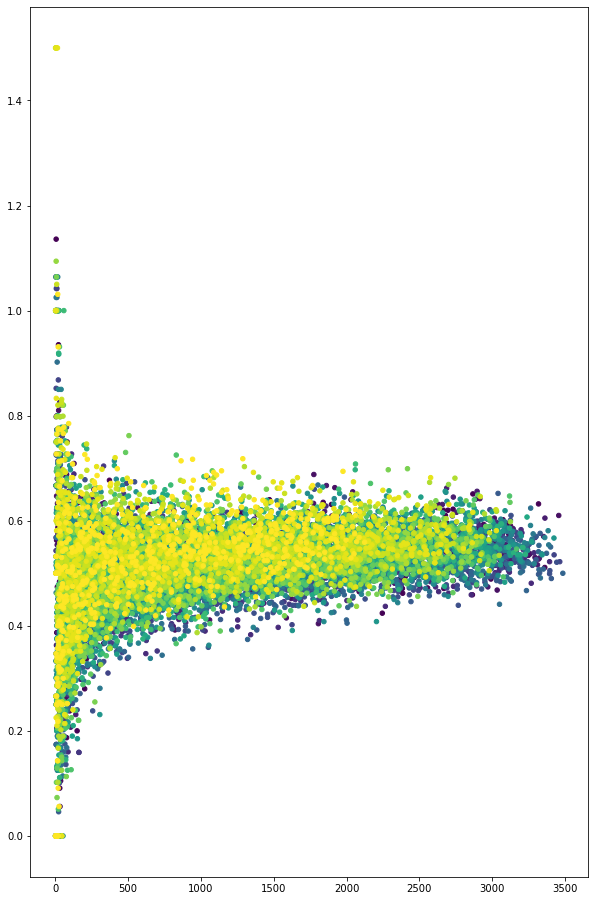

In [6]:
plt.figure(figsize=(10,16))
plt.scatter(df['mp'], df['ts_pct'], s=20, c=df['year'])
plt.show()

### Problem!
Some players appear to be above 1.0, unless they're really good it could be because of some other error. So lets print those players out and see if we can find something that gives them a high shooting percentage

In [7]:
topshoot = df[df['ts_pct'] > 1]

In [8]:
topshoot.head(20)

year           player pos   age team_id    g    mp    per  ts_pct  \
81   1995    Lester Conner  SG  35.0     LAL  2.0   5.0   18.0   1.136   
90   1998     Tom Chambers  PF  38.0     PHI  1.0  10.0   31.5   1.042   
325  1999      Mikki Moore   C  23.0     DET  2.0   6.0   35.7   1.064   
497  1999    Tyson Wheeler  PG  23.0     DEN  1.0   3.0   76.1   1.064   
276  2000     Antonio Lang  SF  27.0     PHI  3.0   6.0   25.2   1.042   
438  2002    Reggie Slater  PF  31.0     NJN  4.0  10.0   17.5   1.025   
91   2005    Jackie Butler   C  19.0     NYK  3.0   5.0   90.3   1.025   
233  2005   Donnell Harvey  PF  24.0     NJN  3.0  16.0   35.2   1.064   
495  2007    Dajuan Wagner  SG  23.0     GSW  1.0   7.0   17.2   1.064   
283  2008     Jerome James   C  32.0     NYK  2.0   5.0   45.3   1.064   
65   2010       Ryan Bowen  SF  34.0     OKC  1.0   8.0   31.3   1.064   
599  2015     Tyrus Thomas  PF  28.0     MEM  2.0   7.0   31.4   1.064   
171  2016  Jimmer Fredette  SG  26.0     NYK  2.0   5.0   47.4   1.094   
85   2018    Anthony Brown  SF  25.0     MIN  1.0   4.0   41.9   1.500   
260  2018      Nigel Hayes  SF  23.0     TOR  2.0   6.0   34.9   1.500   
438  2018  Naz Mitrou-Long  SG  24.0     UTA  1.0   1.0  133.8   1.500   
593  2018   David Stockton  PG  26.0     UTA  3.0   9.0   33.9   1.050   
347  2019     John Jenkins  SG  27.0     WAS  4.0  14.0   20.5   1.500   
619  2019    Jordan Sibert  SG  26.0     ATL  1.0   4.0   29.7   1.500   
592  2020      Noah Vonleh  PF  24.0     DEN  3.0  16.0   20.9   1.031   

     fg3a_per_fga_pct  ...  ws-dum  ows  dws   ws  ws_per_48  bpm-dum   obpm  \
81                NaN  ...     NaN  0.0  0.0  0.0      0.440      NaN   -8.0   
90              0.000  ...     NaN  0.0  0.0  0.1      0.369      NaN    3.2   
325             0.000  ...     NaN  0.1  0.0  0.1      0.527      NaN   15.2   
497             1.000  ...     NaN  0.1  0.0  0.1      1.367      NaN   42.5   
276             0.000  ...     NaN  0.0  0.0  0.1      0.405      NaN    8.0   
438             0.000  ...     NaN  0.0  0.0  0.0      0.169      NaN   -2.0   
91              0.000  ...     NaN  0.1  0.0  0.1      1.333      NaN   37.1   
233             0.000  ...     NaN  0.1  0.0  0.2      0.484      NaN    7.2   
495             1.000  ...     NaN  0.0  0.0  0.0      0.122      NaN    4.5   
283             0.000  ...     NaN  0.1  0.0  0.1      0.613      NaN   16.5   
65              0.000  ...     NaN  0.1  0.0  0.1      0.509      NaN    4.1   
599             0.000  ...     NaN  0.1  0.0  0.1      0.477      NaN   11.2   
171             1.000  ...     NaN  0.1  0.0  0.1      0.514      NaN   19.1   
85              1.000  ...     NaN  0.0  0.0  0.0      0.571      NaN   26.2   
260             1.000  ...     NaN  0.0  0.0  0.0      0.018      NaN   17.4   
438             1.000  ...     NaN  0.1  0.0  0.1      2.712      NaN  199.4   
593             1.000  ...     NaN  0.1  0.0  0.1      0.459      NaN    6.7   
347             1.000  ...     NaN  0.1  0.0  0.1      0.202      NaN    7.6   
619             1.000  ...     NaN  0.0  0.0  0.0      0.183      NaN   13.7   
592             0.333  ...     NaN  0.0  0.0  0.1      0.163      NaN    3.4   

     dbpm    bpm  vorp  
81   12.1    4.1   0.0  
90    9.3   12.5   0.0  
325   3.0   18.2   0.0  
497   8.5   51.1   0.0  
276   3.4   11.3   0.0  
438   0.0   -2.0   0.0  
91   18.6   55.7   0.1  
233   5.8   13.0   0.1  
495  -0.3    4.2   0.0  
283   4.6   21.2   0.0  
65    7.7   11.8   0.0  
599   7.3   18.5   0.0  
171   3.5   22.6   0.0  
85    4.3   30.5   0.0  
260   0.8   18.2   0.0  
438  42.7  242.2   0.0  
593   1.1    7.9   0.0  
347  -1.0    6.6   0.0  
619   2.2   16.0   0.0  
592  -0.7    2.7   0.0  

[20 rows x 29 columns]

Players appear to have few matches played so lets make a new table where we remove players with less than 10 matches or 500 minutes (average nba match is 48 minutes)

In [9]:
activePlayer= df[df['mp'] > 500]
activePlayer = activePlayer[activePlayer['year'] < 2020]
#Now graph again

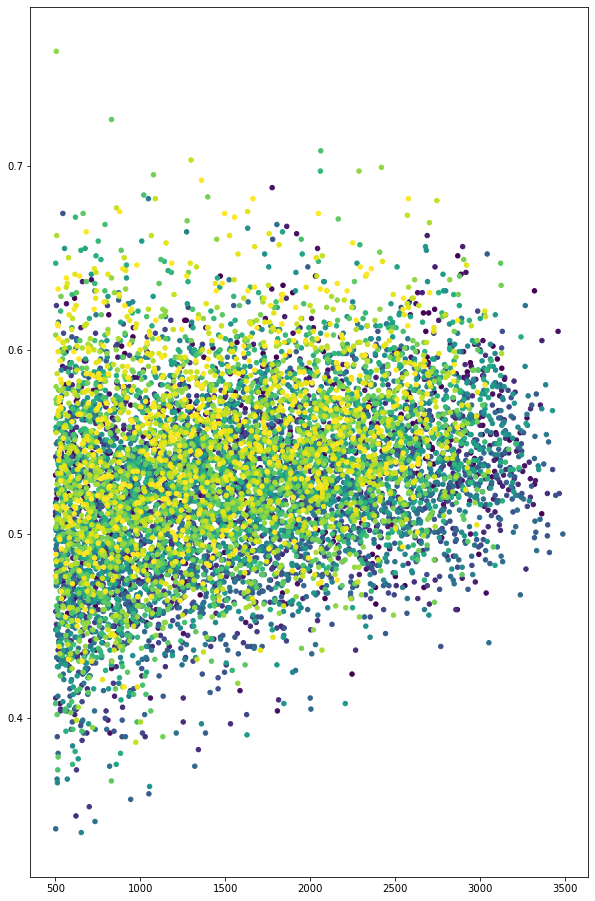

In [10]:
plt.figure(figsize=(10,16))
plt.scatter(activePlayer['mp'], activePlayer['ts_pct'], s=20, c=activePlayer['year'])
plt.show()

### Lets make a scatter plot examing relations of BPM and minutes played


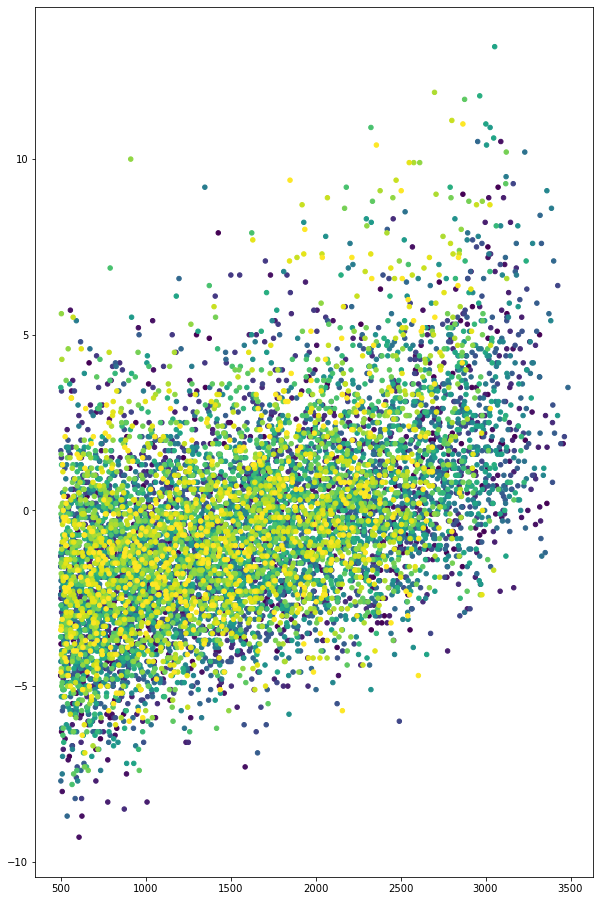

In [11]:
plt.figure(figsize=(10,16))
plt.scatter(activePlayer['mp'], activePlayer['bpm'], s=20, c=activePlayer['year'])
plt.show()

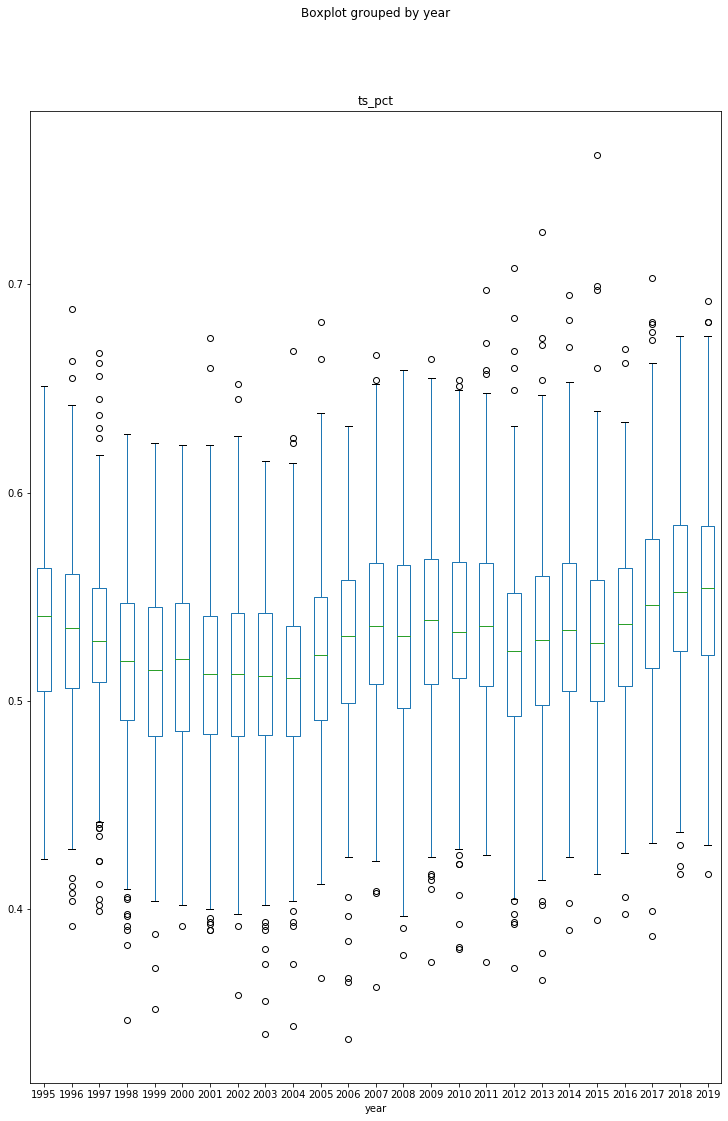

In [12]:
activePlayer.boxplot(by ='year', column =['ts_pct'], grid = False, figsize=(12,18) ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA69C58A48>,
      dtype=object)

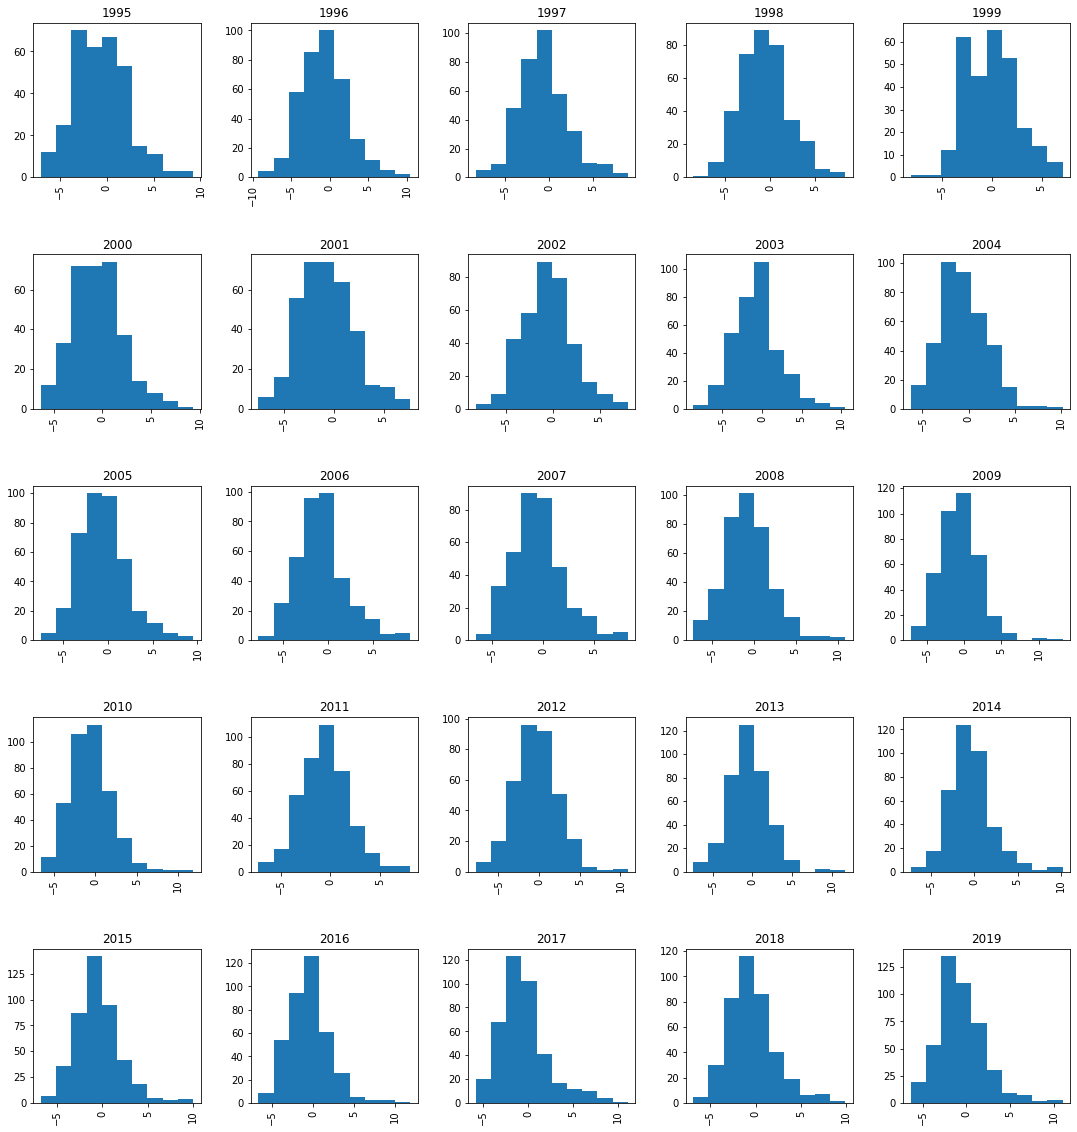

In [13]:
activePlayer['bpm'].hist(by=activePlayer['year'], figsize = (18,20))

## Top Players from 2019 - 2010
We will use a parallel coordinate graph

In [14]:
graphit = activePlayer[activePlayer['bpm'] > 3.5]
graphit = graphit[graphit['year'] > 2010]
#clustering = graphit


graphit.drop(graphit.columns.difference(['year','per','ts_pct','obpm','dbpm','bpm','vorp']), 1, inplace=True)

fig = px.parallel_coordinates(graphit, color="year", labels={"year": "Year",
               "per": "Player Efficiency Rating", "ts_pct": "Shooting %",
                "obpm": "OBPM", "dbpm": "DBPM","bpm":"BPM","vorp":"VORP",},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

## Findings from graph
There is too much data to make sense of what's going on. This could be better explored in the next part, but for now the biggest failing is how hard it is to color the lines...

# PHASE 3

### Hypothesis
For this assignment we will use our data to see which traits better correlate to the popularity of a basketball player. We will first analyze a couple seasons spanning back a couple years and then focus on the current season to determine how any of these patterns we discover reflect on the social media popularity of a player. We will test different metrics to get a better understanding.

First step we will pick a couple of data points to run and use it to see how many clusters we can make.

c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



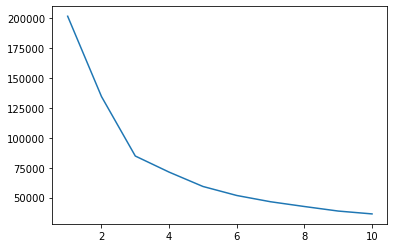

In [15]:
bpm = activePlayer[activePlayer['year'] > 2005]
bpm.drop(bpm.columns.difference(['year','ows','dws','ws','bpm']), 1, inplace=True)

errors = []

#getting this implementation from datascience website, I made something similar for cs171 but this one uses libraries
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bpm)
    errors.append(kmeans.inertia_)
plt.plot(range(1, 11), errors)

plt.show()

### It appears we can work with 3 clusters so now we will implement it.

Special note: the algorithm implementation of kmeans is one I used for a different class, I had difficulty using the seaborn library and KMeans function to graph my result so opted for a method I was familar with.

In [16]:
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    #k is number of clusters
    assignments = []
    centroids = []
    all_sse = []
    iters = 0
    test = sample(all_vals,K)
    for i in range (max_iter):
        #print ("max iter start:", i)
        temp = []
        error = 0
        for j in all_vals:
            #print ("al_vals:",j)
            closest_distance = math.inf
            closest=0
            for get,k in enumerate(test):
                #print ("get should be 0 then 1:",get)
                #print ("test:",k)
                dist = np.linalg.norm(np.array(j)-np.array(k))
                if dist<closest_distance:
                    closest_distance=dist
                    closest=get 
                error += dist
            
            temp.append(closest)
        
        iters +=1
        all_sse.append(error)
        assignments = list(temp)
        if (i>0) and(np.absolute(all_sse[i] - all_sse[i-1])/all_sse[i-1] <= tol):
            break
        for m in range (len(test)):
            #fix it later i think?
            centroids.append(np.mean(test[m],axis=0))
    return assignments, centroids, all_sse, iters
bpm.head()

year  ows  dws   ws  bpm
0  2006  4.0  2.2  6.2  0.9
2  2006  0.0  1.0  1.0 -2.7
3  2006  9.8 -0.3  9.5  4.4
4  2006  0.6  1.0  1.7 -1.4
5  2006  0.2  3.1  3.4 -0.4

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(bpm)
plt.scatter(bpm[:,0], bpm[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
bpm1 = bpm[['ws','bpm']].values
bpm1 = bpm.tolist()
results = kmeans_clustering (bpm1,3)

bpm['assignment'] = results[0]
sns.scatterplot(x='ws', y='bpm',hue="assignment", data=bpm,palette=['green','red','blue'],)
